In [1]:

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import RZGate
from qiskit.quantum_info import Operator
import numpy as np
import json
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli
import os
import matplotlib.pyplot as plt
import itertools
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import DensityMatrix, partial_trace, Operator
import numpy as np

import Create_quantum_circuit
# import Compare_closeness_quantum_state 
# import Simulate_local_observable
import Manipulate_layers
# import Computing_with_reduced_state
# import Statistics
# import Deal_with_dictionary
import time
import local_projection_computation
import Checking_Weak_Equivalence

## This notebook runs experiments on checking WEAK EQUIVALENCE and EQUIVALENCE 


### Circuit Equivalence Checking — Figure 5a and Figure 6

The following blocks reproduce the experiments corresponding to **Figure 5a** and **Figure 6** in the paper.

We compare two methods for checking whether two quantum circuits are equivalent:

---

### 🔍 Functions Used (from `Checking_Weak_Equivalence.py`)

```python
def local_projection_check_if_two_circuits_are_equal(
    qc_info_1, qc_info_2, tolerance=1e-15
)

In [2]:
#Example usage:

qc_1, qc_info_1 = Create_quantum_circuit.create_random_haar_circuit(20, 3)
qc_2, qc_info_2 = Create_quantum_circuit.create_random_haar_circuit(20, 3)


#check if two equal circuits are equal
print("check if two equal circuits are equal, expected: True, True")
print('result:',Checking_Weak_Equivalence.local_projection_check_if_two_circuits_are_equal(qc_info_1, qc_info_1,tolerance=1e-15),Checking_Weak_Equivalence.state_vector_computation_check_if_two_circuits_are_equal(qc_1, qc_1,tolerance=1e-15))


# check if two different circuits are equal
print("\n\ncheck if two different circuits are equal, expected: False, False")
print('result:',Checking_Weak_Equivalence.local_projection_check_if_two_circuits_are_equal(qc_info_1, qc_info_2,tolerance=1e-15),Checking_Weak_Equivalence.state_vector_computation_check_if_two_circuits_are_equal(qc_1, qc_2,tolerance=1e-15))

check if two equal circuits are equal, expected: True, True
result: True True


check if two different circuits are equal, expected: False, False
result: False False


## Measuring Runtime of Equivalence Checking Methods

We now proceed to **measure the runtime** of the two equivalence checking methods:

1. **Local Projection Method**
2. **Statevector Simulation**


###  Output Files

The measured runtimes will be saved in the following files:

- `Evaluation_Artifact_comparison_results_running_time_checking_Equivalence.txt`  
- `Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence.txt`

These files separately store results for **equivalent** and **inequivalent** circuit pairs.

###  Visualization

Once the data is collected, we will generate plots to visualize and compare how runtime scales with the number of qubits.


###  Initial Setup

To begin, we test with a **small number of qubits** to verify correctness and quickly observe performance trends.

Running benchmark for checking equivalence...
12 qubits: Local Projection = 0.123691s ± 0.000000s, Statevector = 0.110645s ± 0.000000s, Inconsistencies = 0
14 qubits: Local Projection = 0.144382s ± 0.000000s, Statevector = 0.133111s ± 0.000000s, Inconsistencies = 0
16 qubits: Local Projection = 0.181324s ± 0.000000s, Statevector = 0.159812s ± 0.000000s, Inconsistencies = 0
18 qubits: Local Projection = 0.208298s ± 0.000000s, Statevector = 0.157960s ± 0.000000s, Inconsistencies = 0
20 qubits: Local Projection = 0.263545s ± 0.000000s, Statevector = 0.173680s ± 0.000000s, Inconsistencies = 0
22 qubits: Local Projection = 0.300748s ± 0.000000s, Statevector = 0.231994s ± 0.000000s, Inconsistencies = 0
24 qubits: Local Projection = 0.335333s ± 0.000000s, Statevector = 0.595844s ± 0.000000s, Inconsistencies = 0
26 qubits: Local Projection = 0.368768s ± 0.000000s, Statevector = 1.639732s ± 0.000000s, Inconsistencies = 0
28 qubits: Local Projection = 0.388071s ± 0.000000s, Statevector = 6.01803

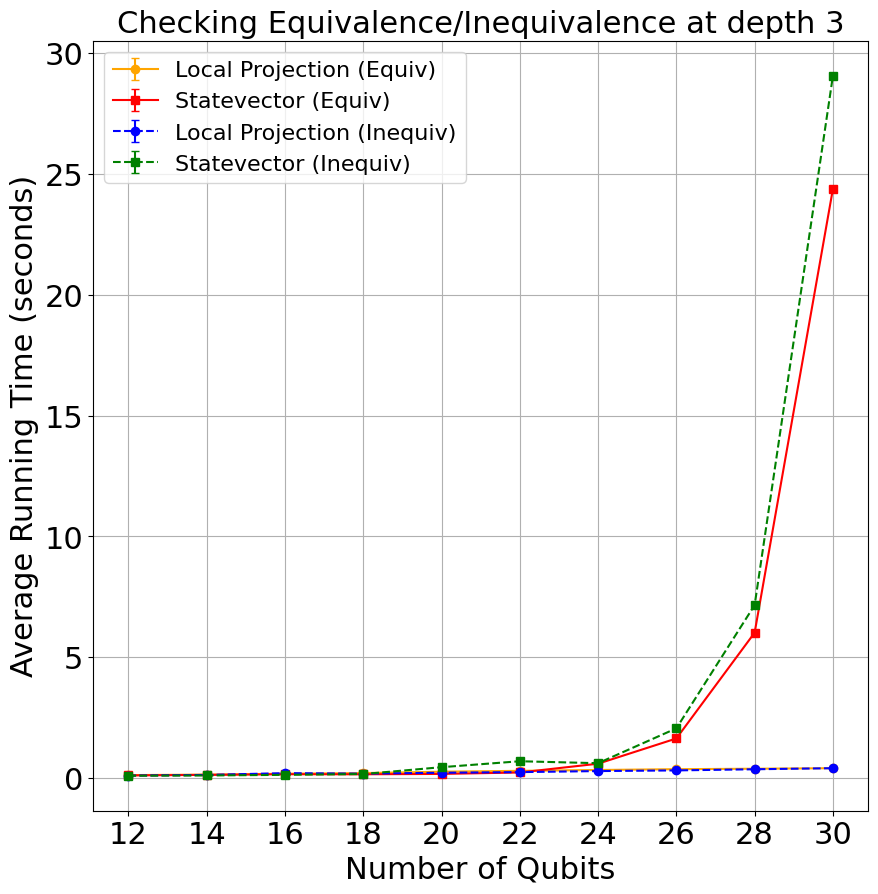

In [3]:

# Run the benchmarking function with different qubit ranges for each method

min_qubits_lp=12 # Minimum number of qubits for local projection method
max_qubits_lp=30 # Maximum number of qubits for local projection method
min_qubits_sv=12 # Minimum number of qubits for state vector method
max_qubits_sv=30 # Maximum number of qubits for state vector method
depth=3 # Depth of the quantum circuits to be generated
n_patterns=1 # Number of patterns to be generated

print("Running benchmark for checking equivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence.txt",
                                                        checking_Inequivalence=False,       
                                                        min_qubits_lp=min_qubits_lp,
                                                        max_qubits_lp=max_qubits_lp,
                                                        min_qubits_sv=min_qubits_sv,
                                                        max_qubits_sv=max_qubits_sv,
                                                        depth=depth, n_patterns=n_patterns)
print("Running benchmark for checking inequivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence.txt",
                                                       checking_Inequivalence=True,
                                                       min_qubits_lp=min_qubits_lp,
                                                       max_qubits_lp=max_qubits_lp,
                                                       min_qubits_sv=min_qubits_sv,
                                                       max_qubits_sv=max_qubits_sv,
                                                       depth=depth, n_patterns=n_patterns)
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence.txt",
                                    file_equivalence="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence.txt",
                                    output_file_name="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_vs_Inequivalence.pdf",depth=depth)

## Below is an expected result

[12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


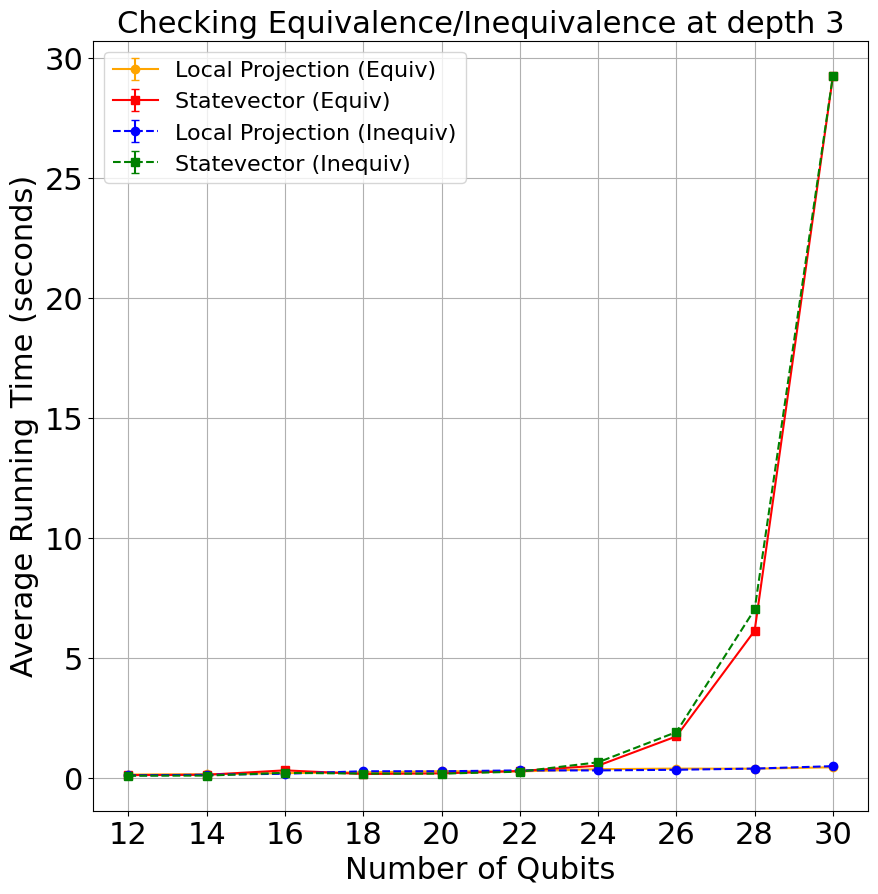

In [2]:

depth=3
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence_prototype_version.txt",
                                    file_equivalence="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_prototype_version.txt",
                                    output_file_name="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_vs_Inequivalence_prototype.pdf",depth=depth)

## By fixing the maximal number of qubits for local projection method to 100, we can get the results as in the FIG 5a

Running benchmark for checking equivalence...
12 qubits: Local Projection = 0.142975s ± 0.000000s, Statevector = 0.154473s ± 0.000000s, Inconsistencies = 0
14 qubits: Local Projection = 0.193482s ± 0.000000s, Statevector = 0.168012s ± 0.000000s, Inconsistencies = 0
16 qubits: Local Projection = 0.201940s ± 0.000000s, Statevector = 0.186975s ± 0.000000s, Inconsistencies = 0
18 qubits: Local Projection = 0.243310s ± 0.000000s, Statevector = 0.158992s ± 0.000000s, Inconsistencies = 0
20 qubits: Local Projection = 0.284794s ± 0.000000s, Statevector = 0.420914s ± 0.000000s, Inconsistencies = 0
22 qubits: Local Projection = 0.342877s ± 0.000000s, Statevector = 0.230868s ± 0.000000s, Inconsistencies = 0
24 qubits: Local Projection = 0.368271s ± 0.000000s, Statevector = 0.625444s ± 0.000000s, Inconsistencies = 0
26 qubits: Local Projection = 0.357434s ± 0.000000s, Statevector = 1.625875s ± 0.000000s, Inconsistencies = 0
28 qubits: Local Projection = 0.375113s ± 0.000000s, Statevector = 7.34414

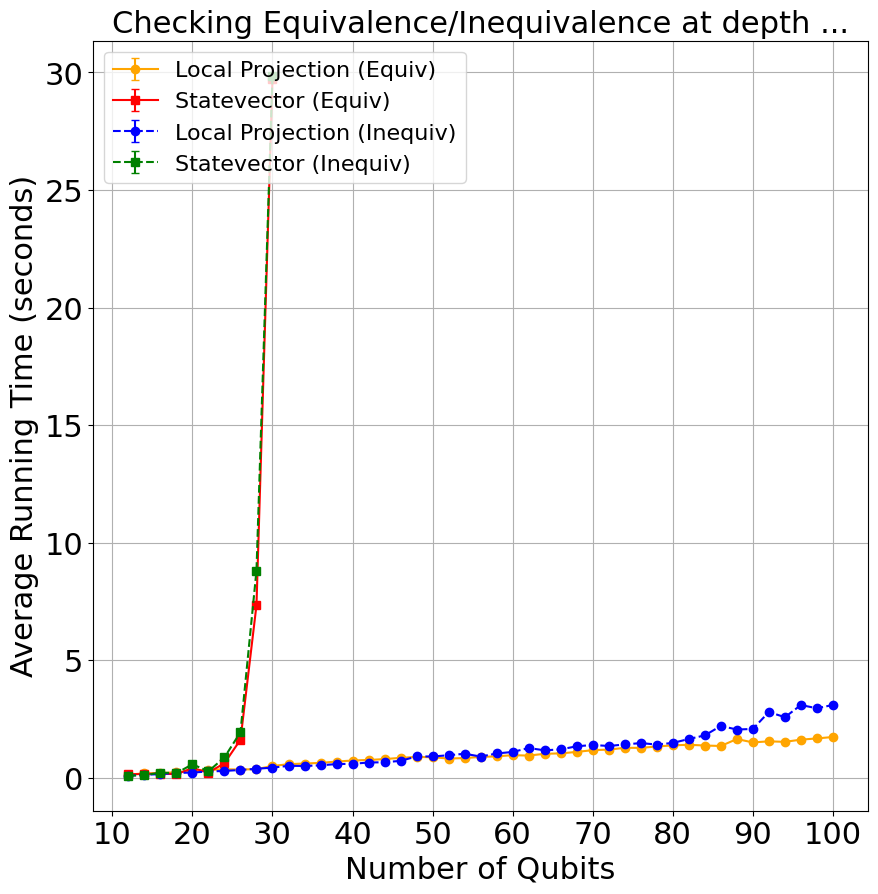

In [ ]:
min_qubits_lp=12 # Minimum number of qubits for local projection method
max_qubits_lp=100 # Maximum number of qubits for local projection method
min_qubits_sv=12 # Minimum number of qubits for state vector method
max_qubits_sv=30 # Maximum number of qubits for state vector method
depth=3 # Depth of the quantum circuits to be generated
n_patterns=1 # Number of patterns to be generated



# Run the benchmarking function with different qubit ranges for each method
print("Running benchmark for checking equivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_reproduce_5a.txt",
                                                        checking_Inequivalence=False,
                                                        min_qubits_lp=min_qubits_lp,
                                                        max_qubits_lp=max_qubits_lp, 
                                                        min_qubits_sv=min_qubits_sv, 
                                                        max_qubits_sv=max_qubits_sv,
                                                        depth=depth, n_patterns=n_patterns)
print("Running benchmark for checking inequivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence_reproduce_5a.txt",
                                                       checking_Inequivalence=True,
                                                       min_qubits_lp=min_qubits_lp,
                                                       max_qubits_lp=max_qubits_lp,
                                                       min_qubits_sv=min_qubits_sv,
                                                       max_qubits_sv=max_qubits_sv,
                                                       depth=depth,n_patterns=n_patterns)

# Call the function with the two files
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence_reproduce_5a.txt",
                                    file_equivalence="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_reproduce_5a.txt",
                                    output_file_name='Evaluation_Artifact_reproduced_5a.pdf',depth=depth)

## The submitted FIG 5a is here

[12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


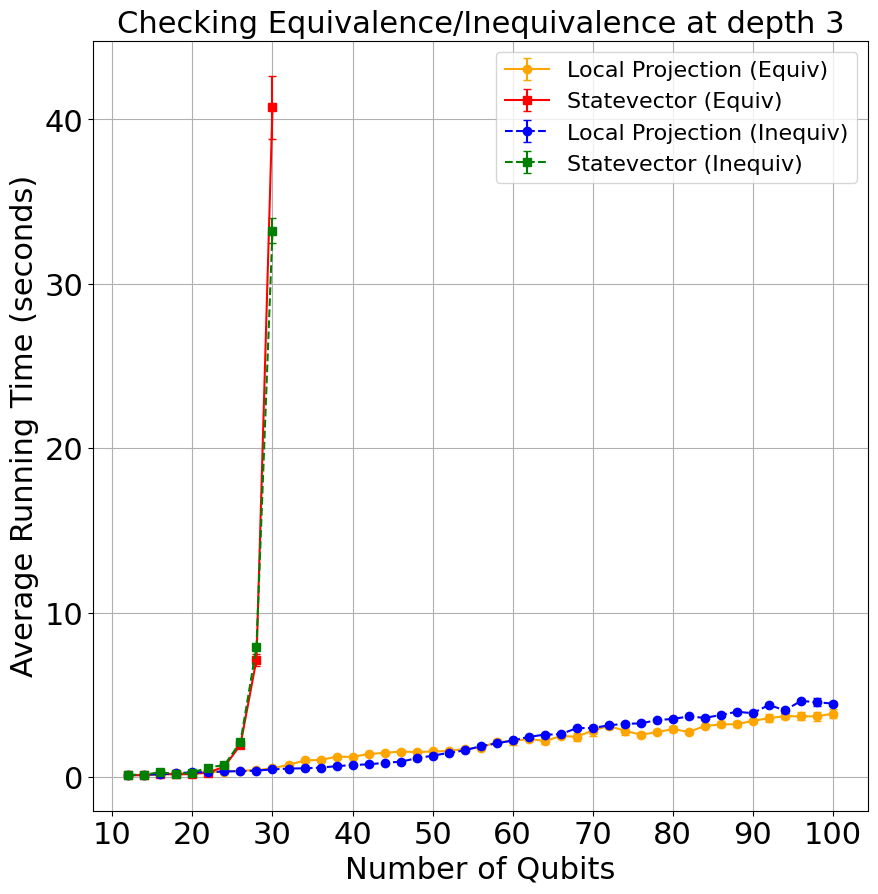

In [5]:
depth=3
# Call the function with the two files
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="SUBMITTED_comparison_results_running_time_checking_inequivalence_with_larger_n_qubis_for_local_projection_FIG_5a.txt",
                                    file_equivalence="SUBMITTED_comparison_results_running_time_checking_equivalence_with_larger_n_qubis_for_local_projection_FIG_5a.txt",
                                    output_file_name='SUBMITTED_FIG_5a.pdf',depth=depth)

## Now we reproduce FIG 6 by changing depth to 4


Running benchmark for checking equivalence...
14 qubits: Local Projection = 118.115703s ± 0.000000s, Statevector = 0.211710s ± 0.000000s, Inconsistencies = 0
16 qubits: Local Projection = 219.691370s ± 0.000000s, Statevector = 0.234352s ± 0.000000s, Inconsistencies = 0
18 qubits: Local Projection = 319.056828s ± 0.000000s, Statevector = 0.264061s ± 0.000000s, Inconsistencies = 0
20 qubits: Local Projection = 438.837092s ± 0.000000s, Statevector = 0.500204s ± 0.000000s, Inconsistencies = 0
22 qubits: Local Projection = 543.455182s ± 0.000000s, Statevector = 0.431478s ± 0.000000s, Inconsistencies = 0
24 qubits: Local Projection = 635.909538s ± 0.000000s, Statevector = 1.094939s ± 0.000000s, Inconsistencies = 0
26 qubits: Local Projection = 750.463716s ± 0.000000s, Statevector = 3.432131s ± 0.000000s, Inconsistencies = 0
28 qubits: Local Projection = 830.269505s ± 0.000000s, Statevector = 15.893448s ± 0.000000s, Inconsistencies = 0
30 qubits: Local Projection = 962.705930s ± 0.000000s, St

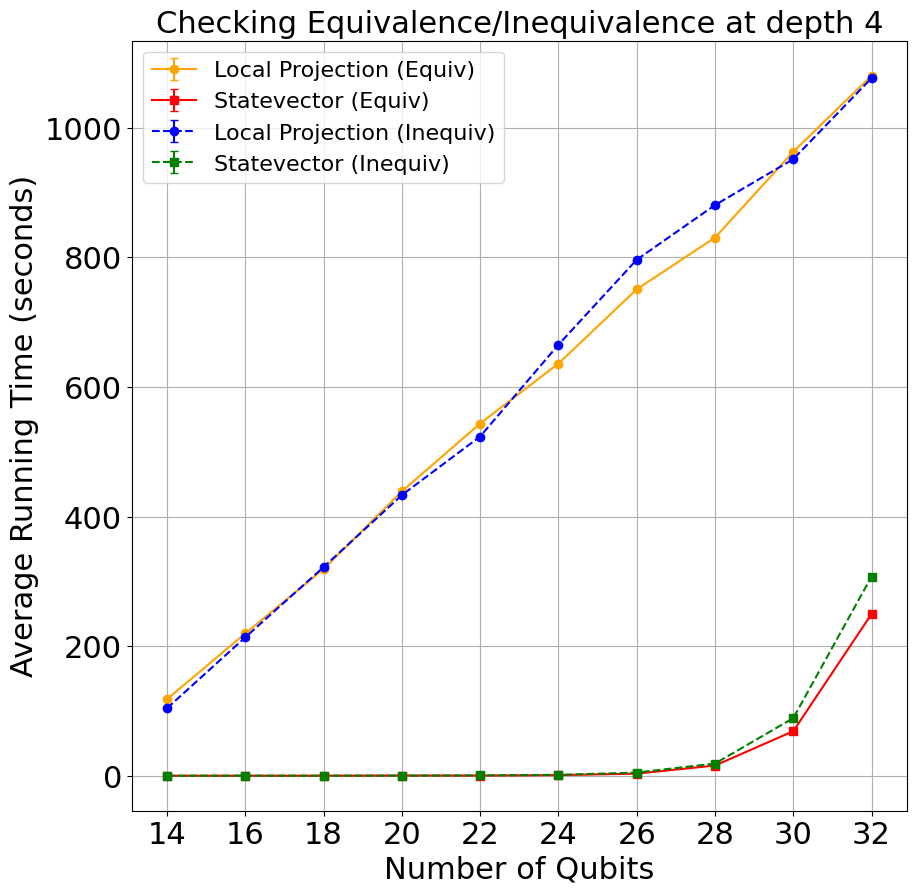

In [5]:
min_qubits_lp=14  # Minimum number of qubits for local projection method 
max_qubits_lp=32 # Maximum number of qubits for local projection method
min_qubits_sv=14 # Minimum number of qubits for state vector method
max_qubits_sv=32 # Maximum number of qubits for state vector method 
depth = 4 # Depth of the quantum circuits to be generated
n_patterns=1 # Number of patterns to be generated



# Run the benchmarking function with different qubit ranges for each method
print("Running benchmark for checking equivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_reproduce_FIG_6.txt",
                                                        checking_Inequivalence=False, 
                                                        min_qubits_lp=min_qubits_lp,
                                                        max_qubits_lp=max_qubits_lp,
                                                        min_qubits_sv=min_qubits_sv,
                                                        max_qubits_sv=max_qubits_sv,
                                                        depth=depth,
                                                        n_patterns=n_patterns)
print("Running benchmark for checking inequivalence...")
Checking_Weak_Equivalence.benchmark_methods_comparison(file_name="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence_reproduce_FIG_6.txt",
                                                       checking_Inequivalence=True,
                                                       min_qubits_lp=min_qubits_lp,
                                                       max_qubits_lp=max_qubits_lp,
                                                       min_qubits_sv=min_qubits_sv,
                                                       max_qubits_sv=max_qubits_sv,
                                                       depth=depth,
                                                       n_patterns=n_patterns)

# Call the function with the two files
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="Evaluation_Artifact_comparison_results_running_time_checking_Inequivalence_reproduce_FIG_6.txt",
                                    file_equivalence="Evaluation_Artifact_comparison_results_running_time_checking_Equivalence_reproduce_FIG_6.txt",output_file_name='Evaluation_Artifact_reproduced_FIG_6.pdf',
                                    depth=depth)

## Here is the submitted FIG 6


[14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


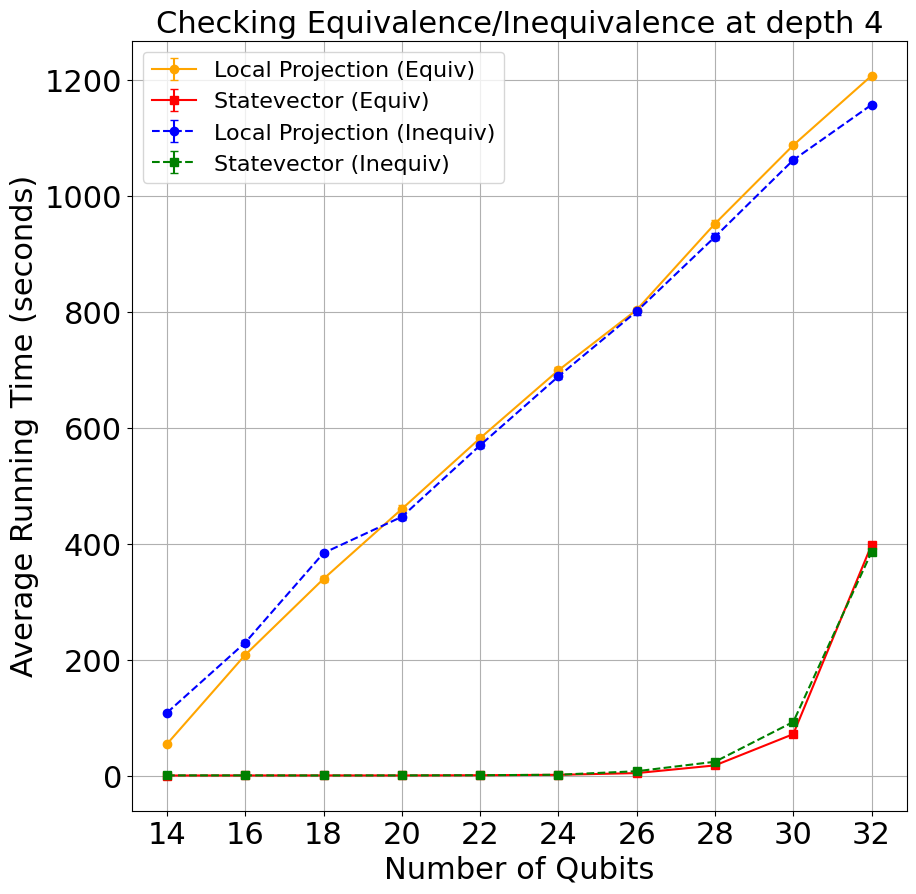

In [4]:
depth=4
Checking_Weak_Equivalence.plot_statevector_vs_local_projection(file_difference="SUBMITTED_comparison_results_running_time_checking_inequivalence_with_larger_n_qubis_for_local_projection_depth_4_FIG_6.txt",
                                    file_equivalence="SUBMITTED_comparison_results_running_time_checking_equivalence_with_larger_n_qubis_for_local_projection_depth_4_FIG_6.txt",
                                    output_file_name='SUBMITTED_FIG_6.pdf',depth=depth)